# Análisis de Correspondencias y Clustering Funcional

Este proyecto presenta dos técnicas de aprendizaje no supervisado aplicadas a diferentes tipos de datos: análisis de correspondencias para datos categóricos y clustering funcional para datos de series temporales.

## Parte 1: Análisis de Correspondencias para Percepción de Marcas

El análisis de correspondencias es una técnica que permite describir las relaciones existentes entre dos variables nominales, recogidas en una tabla de contingencia, sobre un espacio de pocas dimensiones, mientras que al mismo tiempo se describen las relaciones entre las categorías de cada variable.

En este análisis, estudiamos cómo se relacionan los atributos de diferentes marcas de café refrigerado entre sí utilizando el análisis de correspondencias. El objetivo es comprender la relación en la percepción de los consumidores sobre distintas marcas de café refrigerado. 

Disponemos de una tabla de frecuencias donde para cada marca de café refrigerado conocemos el número de personas que lo vinculan con un cierto atributo.


La lista de atributos percibidos y las etiquetas utilizadas son las siguientes:


| <i></i> Atributo|  Etiqueta |  Atributo | Etiqueta |  
| --- | --- |  --- |  --- |
| good hangover cure | cure |fattening brand | fattening | 
|low fat/calorie brand	|low fat|	appeals to men|	men|
|brand for children|	children|	South Australian brand|	South Australian|
|working class brand|	working	|traditional/old fashioned brand|	traditional|
|rich/sweet brand|	sweet	|premium quality brand|	premium|
|unpopular brand|	unpopular|	healthy brand|	healthy|
|brand for fat/ugly people|	ugly|	high caffeine brand|	caffeine|
|very fresh|	fresh|	new brand|	new|
|brand for yuppies|	yuppies	|brand for attractive people|	attractive|
|nutritious brand|	nutritious|	tough brand	|tough|
|brand for women|	women	|popular brand|	popular|
|minor brand|	minor|   |   |
| <i></i> |


Comenzamos cargando las librerías necesarias para el análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import prince

A continuación, cargamos el conjunto de datos disponible.

In [2]:
df = pd.read_csv("coffe.csv",sep=";")
df.head()

,image,brand,freq
0,fattening,AA,82
1,men,AA,96
2,South Australian,AA,72
3,traditional,AA,101
4,premium,AA,66


### Exploración y Preprocesamiento de Datos

Realizamos una exploración exhaustiva de los datos para comprender su estructura y determinar las acciones de preprocesamiento necesarias.

In [ ]:
# Exploración inicial de los datos
print("Información básica del dataset:")
df.info()

1. Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   135 non-null    object
 1   brand   135 non-null    object
 2   freq    135 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [ ]:
print("\nEstadísticas descriptivas de las frecuencias:")
df['freq'].describe()


2. Estadísticas descriptivas de las frecuencias:


count    135.000000
mean      34.533333
std       34.149321
min        1.000000
25%        9.000000
50%       22.000000
75%       48.500000
max      144.000000
Name: freq, dtype: float64

In [ ]:
print("\nNúmero de marcas únicas:")
print("Marcas:", df['brand'].unique())
print("Número de marcas:", df['brand'].nunique())


3. Número de marcas únicas:
Marcas: ['AA' 'BB' 'CC' 'DD' 'EE' 'FF']
Número de marcas: 6


In [ ]:
print("\nNúmero de atributos únicos:")
print("Atributos:", df['image'].unique())
print("Número de atributos:", df['image'].nunique())


4. Número de atributos únicos:
Atributos: ['fattening' 'men' 'South Australian' 'traditional' 'premium' 'healthy'
 'caffeine' 'new' 'attractive' 'tough' 'popular' 'cure' 'low fat'
 'children' 'working' 'sweet' 'unpopular' 'ugly' 'fresh' 'yuppies'
 'nutritious' 'women' 'minor']
Número de atributos: 23


In [ ]:
print("\nVerificación de valores nulos:")
print(df.isnull().sum())


5. Verificación de valores nulos:
image    0
brand    0
freq     0
dtype: int64


In [ ]:
# Crear tabla de contingencia para visualizar mejor las relaciones
contingency_table = pd.pivot_table(df, 
                                 values='freq', 
                                 index='brand', 
                                 columns='image', 
                                 fill_value=0)

print("\nDimensiones de la tabla de contingencia:")
contingency_table.shape


6. Dimensiones de la tabla de contingencia:


(6, 23)

In [ ]:
print("\nValores máximos por marca:") 
contingency_table.max(axis=1)


7.1. Valores máximos por marca:


brand
AA    137.0
BB    111.0
CC    144.0
DD     99.0
EE    119.0
FF    110.0
dtype: float64

In [ ]:
print("\nValores mínimos por marca:")
contingency_table.min(axis=1)


7.2. Valores mínimos por marca:


brand
AA    1.0
BB    2.0
CC    0.0
DD    0.0
EE    0.0
FF    1.0
dtype: float64

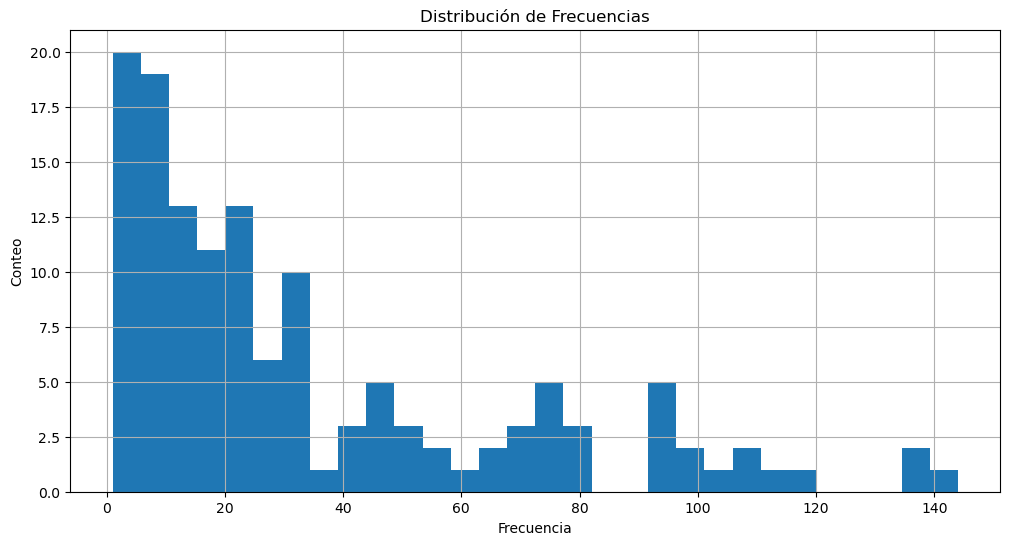

In [11]:
# Visualización de la distribución de frecuencias
plt.figure(figsize=(12, 6))
df['freq'].hist(bins=30)
plt.title('Distribución de Frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Conteo')
plt.show()


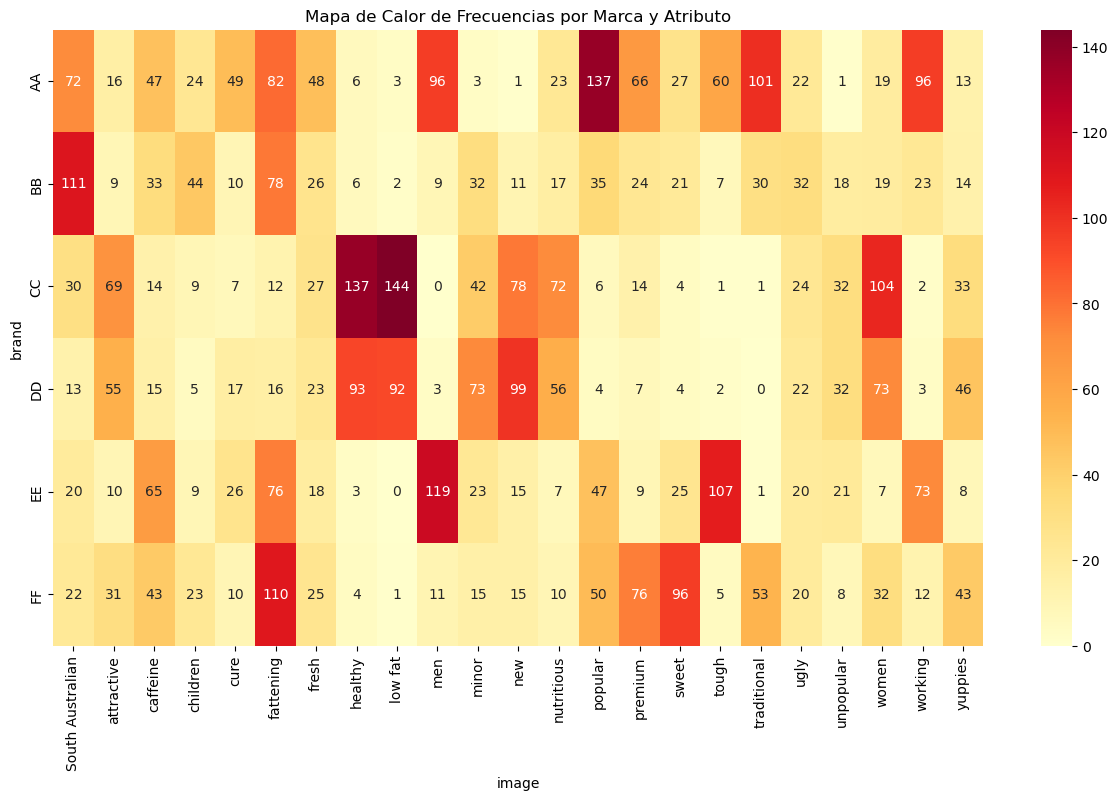

In [12]:
# Heatmap de la tabla de contingencia
plt.figure(figsize=(15, 8))
sb.heatmap(contingency_table, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Mapa de Calor de Frecuencias por Marca y Atributo')
plt.show()

In [ ]:
### Resumen de la Exploración

**Estructura del dataset:**
- 135 filas y 3 columnas: 'image' (atributo), 'brand' (marca), 'freq' (frecuencia)
- No hay valores nulos

**Estadísticas de la variable 'freq':**
- Media: 34.5, Mediana: 22
- Rango: 1-144, Desviación estándar: 34.1
- Distribución asimétrica: la mayoría de frecuencias son bajas, con pocos valores altos

**Diversidad:**
- 6 marcas únicas (AA, BB, CC, DD, EE, FF)
- 23 atributos únicos (fattening, men, healthy, premium, etc.)

**Observaciones:**
- Algunas marcas se asocian fuertemente a ciertos atributos (frecuencias altas)
- Existen combinaciones marca-atributo con frecuencias muy bajas o nulas
- No fue necesario limpiar ni imputar datos
- Se creó una tabla de contingencia (marcas vs atributos) para el análisis posterior

"\n\nEXPLORACIÓN Y PREPROCESAMIENTO DE LOS DATOS\na) Estructura del dataset:\n    - 135 filas y 3 columnas: 'image' (atributo), 'brand' (marca), 'freq' (frecuencia).\n    - No hay valores nulos.\n\nb) Estadísticas de la variable 'freq':\n    - Media: 34.5\n    - Mediana: 22\n    - Mínimo: 1\n    - Máximo: 144\n    - Desviación estándar: 34.1\n    - Distribución asimétrica: la mayoría de frecuencias son bajas, pocos valores altos.\n\nc) Diversidad:\n    - Marcas únicas: 6 (AA, BB, CC, DD, EE, FF)\n    - Atributos únicos: 23 (ej. fattening, men, healthy, premium, etc.)\n\nd) Observaciones de la tabla de contingencia:\n    - Algunas marcas se asocian fuertemente a ciertos atributos (frecuencias altas).\n    - Existen combinaciones marca-atributo con frecuencias muy bajas o nulas.\n\ne) Preprocesamiento realizado:\n    - No fue necesario limpiar ni imputar datos.\n    - Se creó una tabla de contingencia (marcas vs atributos) para el análisis posterior.\n\n"

### Aplicación del Análisis de Correspondencias

Aplicamos el algoritmo de Análisis de Correspondencias (CA) con 2 componentes principales para reducir la dimensionalidad y visualizar las relaciones entre marcas y atributos.

In [14]:
# Aplico el Análisis de Correspondencias (CA) con 2 componentes principales.
ca = prince.CA(n_components=2, random_state=42)
ca = ca.fit(contingency_table)

ca

CA(random_state=42)

### Extracción de Coordenadas

Extraemos las coordenadas de cada atributo y de cada marca en el nuevo espacio de dimensiones reducidas. Estas coordenadas nos permitirán visualizar las relaciones entre las categorías.

In [ ]:
# Extraemos las coordenadas de las marcas en el nuevo espacio
row_coords = ca.row_coordinates(contingency_table)
print("Coordenadas de las marcas en el nuevo espacio:")
row_coords

Coordenadas de las marcas en el nuevo espacio:


,0,1
AA,-0.659273,0.045984
BB,-0.284160,-0.403515
CC,0.995549,0.076093
DD,0.915018,0.100756
EE,-0.650506,0.706190
FF,-0.342878,-0.618376


In [ ]:
# Extraemos las coordenadas de los atributos en el nuevo espacio
col_coords = ca.column_coordinates(contingency_table)
print("Coordenadas de los atributos en el nuevo espacio:")
col_coords

Coordenadas de los atributos en el nuevo espacio:


,0,1
South Australian,-0.303256,-0.349671
attractive,0.656997,-0.055590
caffeine,-0.451801,0.124054
children,-0.351904,-0.513218
cure,-0.389491,0.266397
fattening,-0.514280,-0.265063
fresh,-0.095891,-0.100017
healthy,1.199980,0.174191
low fat,1.305276,0.196272
men,-0.852413,0.825272


### Visualización del Mapa de Correspondencias

El objetivo principal del análisis de correspondencias es obtener un gráfico donde se relacionen las diferentes categorías. Visualizamos tanto las marcas como los atributos en el mismo espacio bidimensional para identificar asociaciones y patrones.

/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_60366/1039953860.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (row_coords[0][i], row_coords[1][i]), color='blue')
/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_60366/1039953860.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (col_coords[0][i], col_coords[1][i]), color='red', fontsize=9)


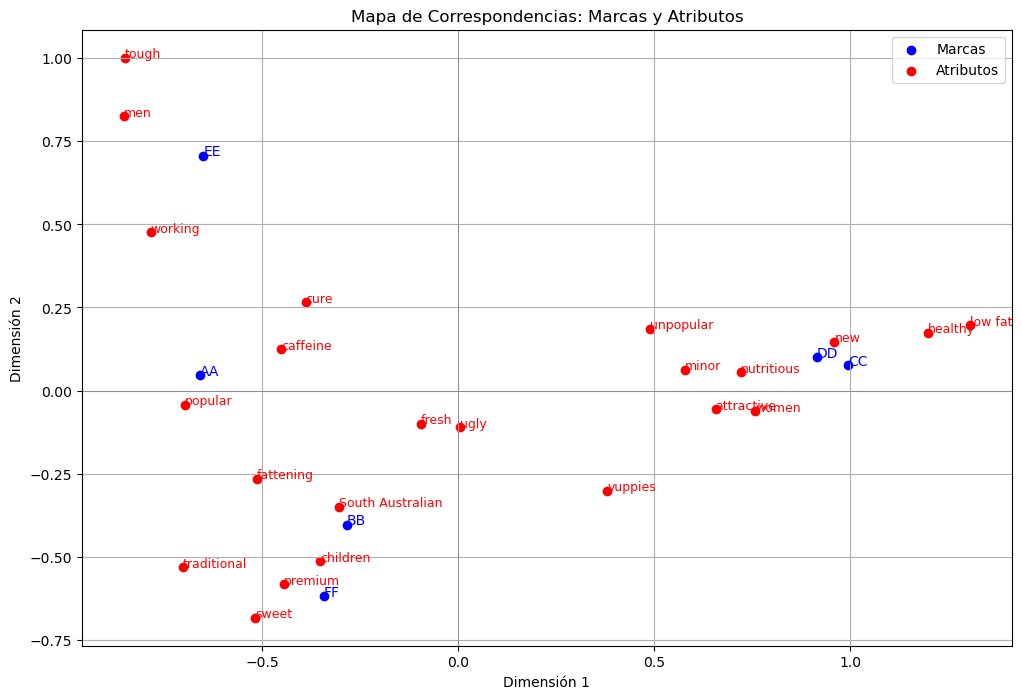

In [ ]:
# Visualizamos marcas y atributos en el espacio de las dos primeras dimensiones
plt.figure(figsize=(12, 8))

# Marcas en azul
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Marcas', s=100)
for i, txt in enumerate(row_coords.index):
    plt.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), color='blue', fontsize=12, fontweight='bold')

# Atributos en rojo
plt.scatter(col_coords.iloc[:, 0], col_coords.iloc[:, 1], c='red', label='Atributos', s=50, alpha=0.7)
for i, txt in enumerate(col_coords.index):
    plt.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), color='red', fontsize=9)

plt.title('Mapa de Correspondencias: Marcas y Atributos', fontsize=14, fontweight='bold')
plt.xlabel('Dimensión 1', fontsize=12)
plt.ylabel('Dimensión 2', fontsize=12)
plt.axhline(0, color='grey', lw=0.5, linestyle='--')
plt.axvline(0, color='grey', lw=0.5, linestyle='--')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Evaluación de la Inercia Explicada

Evaluamos la inercia explicada por cada componente para determinar qué proporción de la variabilidad total capturan las dos primeras dimensiones. Esto nos permite validar la calidad de la representación reducida.

In [ ]:
# Consultamos la inercia explicada por cada dimensión
inercia = ca.explained_inertia_
print("Inercia explicada por cada dimensión:", inercia)
print("Inercia total explicada (suma de las dos dimensiones):", sum(inercia))
print(f"\nDimensión 1: {inercia[0]:.1%}")
print(f"Dimensión 2: {inercia[1]:.1%}")
print(f"Total: {sum(inercia):.1%}")

Inercia explicada por cada dimensión: [0.6293276431033086, 0.19782675931287902]
Inercia total explicada (suma de las dos dimensiones): 0.8271544024161877


In [ ]:
**Interpretación de la inercia explicada:**

- **Dimensión 1:** 62.9% de la variabilidad
- **Dimensión 2:** 19.8% de la variabilidad
- **Total:** 82.7% de la variabilidad total

La inercia explicada es considerablemente alta, lo que genera confianza para interpretar el mapa de correspondencias. La mayor parte de la información relevante está contenida en las dos primeras dimensiones, permitiendo extraer conclusiones con alto grado de confianza sobre cómo se relacionan las marcas y los atributos. El gráfico recoge casi toda la información importante de los datos originales.

'\n\nInercia explicada por cada dimensión\n    - Dimensión 1: 0.629 (62.9%)\n    - Dimensión 2: 0.198 (19.8%)\n\nInercia total explicada: 0.827 (82.7%)\n\nConsidero que la inercia explicada es considerablemente alta. \nEsto genera confianza para interpretar el mapa de correspondencias, ya que la \nmayor parte de la información relevante está contenida en las dos primeras dimensiones.\n\nSe pueden sacar conclusiones alto grado de confianza sobre cómo se relacionan las marcas y \nlos atributos, ya que el gráfico recoge casi toda la información importante de los datos \noriginales.\n\n'

### Interpretación del Mapa de Posicionamiento


In [20]:
"""
    - Si una marca está cerca de un atributo, significa que los consumidores asocian esa marca con ese atributo.

    - Marcas alejadas entre sí tienen perfiles de percepción diferentes.

    - Por ejemplo, DD y CC se asocian a atributos saludables y modernos (“healthy”, “low fat”, “new”), 
    mientras que AA se asocia a atributos como “men” y “working”.
"""

'\n    - Si una marca está cerca de un atributo, significa que los consumidores asocian esa marca con ese atributo.\n\n    - Marcas alejadas entre sí tienen perfiles de percepción diferentes.\n\n    - Por ejemplo, DD y CC se asocian a atributos saludables y modernos (“healthy”, “low fat”, “new”), \n    mientras que AA se asocia a atributos como “men” y “working”.\n'

### Caracterización de las Marcas



In [21]:
"""
    - AA: Se asocia a “working”, “men” y “caffeine”. Es percibida como funcional y dirigida a hombres activos.

    - BB: Se asocia a “children”, “South Australian” y “fattening”. Tiene un perfil más tradicional o familiar.

    - CC y DD: Se asocian a “healthy”, “low fat”, “new” y “nutritious”. Son vistas como marcas saludables y modernas.

    - EE: Se asocia a “men” y “tough”. Se percibe como una marca fuerte o robusta.

    - FF: Se asocia a “premium”, “sweet” y “traditional”. Tiene una imagen de calidad clásica y sabor dulce.
    
"""

'\n    - AA: Se asocia a “working”, “men” y “caffeine”. Es percibida como funcional y dirigida a hombres activos.\n\n    - BB: Se asocia a “children”, “South Australian” y “fattening”. Tiene un perfil más tradicional o familiar.\n\n    - CC y DD: Se asocian a “healthy”, “low fat”, “new” y “nutritious”. Son vistas como marcas saludables y modernas.\n\n    - EE: Se asocia a “men” y “tough”. Se percibe como una marca fuerte o robusta.\n\n    - FF: Se asocia a “premium”, “sweet” y “traditional”. Tiene una imagen de calidad clásica y sabor dulce.\n    \n'

### Análisis de Competencia



In [ ]:
El análisis del mapa revela que existe mayor competencia entre las marcas **CC y DD**, ya que están muy cerca en el espacio de correspondencias y comparten atributos similares (saludables y modernos).

Esta proximidad indica que ambas marcas buscan atraer al mismo segmento de consumidores interesados en salud y novedades, lo que genera una competencia directa en este nicho de mercado. Esta situación puede requerir estrategias de diferenciación más específicas para evitar la canibalización mutua.

'\n    - Hay mayor competencia entre CC y DD porque están muy cerca en el mapa y comparten atributos saludables y modernos.\n\n    - Esto ocurre porque ambas marcas buscan atraer al mismo tipo de consumidor interesado en salud y novedades.\n'

### Propuesta de Posicionamiento para una Nueva Marca

In [23]:
"""
    - Situaría la nueva marca cerca de los atributos “premium” y “attractive”, donde hay menos competencia.

    - La presentaría como una marca de alta calidad y con imagen aspiracional, para diferenciarla de las marcas centradas en salud o funcionalidad.
"""

'\n    - Situaría la nueva marca cerca de los atributos “premium” y “attractive”, donde hay menos competencia.\n\n    - La presentaría como una marca de alta calidad y con imagen aspiracional, para diferenciarla de las marcas centradas en salud o funcionalidad.\n'

## Parte 2: Clustering Funcional para Datos de Series Temporales

En esta segunda parte, aplicamos técnicas de clustering funcional (Functional Data Analysis, FDA) sobre un dataset de temperaturas en España. Trabajamos con el dataset `fetch_aemet` de scikit-fda, que contiene datos meteorológicos de estaciones españolas.

El objetivo es demostrar cómo el clustering funcional puede identificar patrones en datos de series temporales, considerando la forma completa de las curvas en lugar de valores puntuales.

**Descripción del dataset:**

Los datos corresponden a registros diarios de 73 estaciones meteorológicas españolas para el periodo 1980-2009. El dataset contiene información geográfica de cada estación y la media de temperatura diaria. Los datos fueron obtenidos a través de la AEMET (Agencia Estatal de Meteorología) en 2009. Más información: [AEMET](http://www.aemet.es/)

Comenzamos importando los datos necesarios:

In [24]:
!pip install scikit-fda

In [25]:
from skfda import datasets
X, y = datasets.fetch_aemet(return_X_y=True, as_frame=True)

### Selección de Curvas Representativas

Para el análisis, seleccionamos 10 curvas de temperatura que representen comportamientos climáticos diferentes. Esta selección permite capturar la variabilidad geográfica del clima español, incluyendo estaciones del norte y del sur que presentan patrones térmicos distintos.

In [ ]:
# Seleccionamos 10 curvas: 5 primeras y 5 últimas para capturar diversidad geográfica
indices_seleccionados = list(range(5)) + list(range(-5, 0))
X_seleccionadas = X.iloc[indices_seleccionados]
print(f"Curvas seleccionadas: {len(X_seleccionadas)}")


### Exploración Visual de las Curvas

Realizamos una exploración visual de las curvas seleccionadas para comprender los patrones de temperatura a lo largo del año.

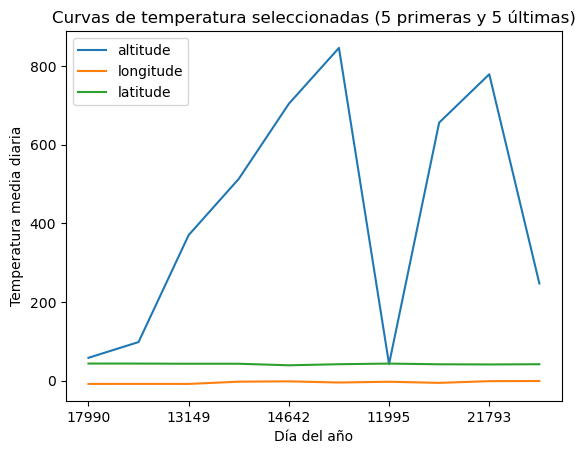

In [ ]:
# Visualizamos las curvas seleccionadas
X_seleccionadas.plot()
plt.title("Curvas de Temperatura Seleccionadas", fontsize=14, fontweight='bold')
plt.xlabel("Día del año", fontsize=12)
plt.ylabel("Temperatura media diaria (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Aplicación de K-Means Funcional

Aplicamos el algoritmo K-Means funcional para agrupar las curvas de temperatura según su similitud. Seleccionamos el número de clusters basándonos en la variabilidad observada en las curvas, que sugiere la existencia de al menos dos grupos principales (climas más fríos del norte y más cálidos del sur).

Etiquetas de cluster para cada curva: [1 1 1 0 0 0 1 0 0 0]


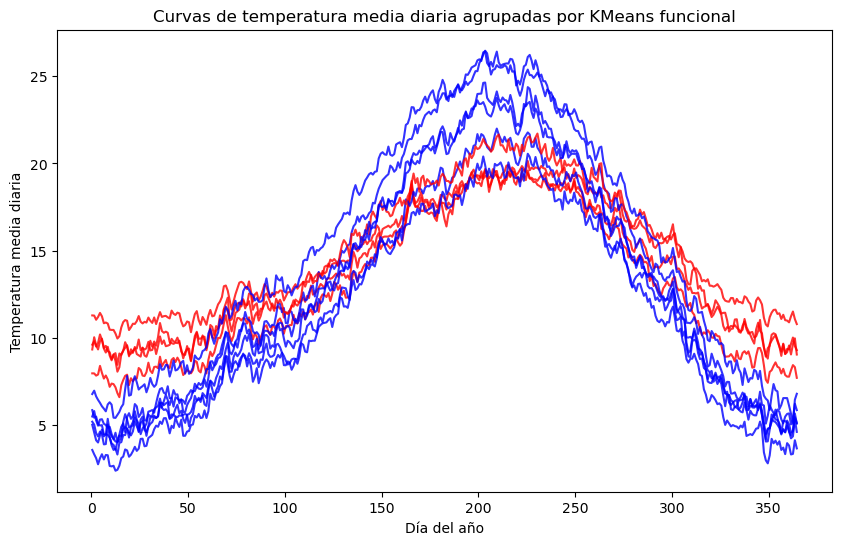

In [ ]:
import numpy as np
from skfda.representation.grid import FDataGrid
from skfda.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Extraemos los datos numéricos de cada FDataGrid en la columna 'daily averages'
curvas = []
for fd in X['daily averages']:
    curvas.append(fd.data_matrix[0])  # Solo la primera dimensión (temperatura media diaria)

curvas = np.array(curvas)

# Creamos el FDataGrid con las curvas extraídas
fd = FDataGrid(
    data_matrix=curvas,
    grid_points=X['daily averages'].iloc[0].grid_points
)

# Seleccionamos 10 curvas: 5 primeras y 5 últimas
indices_seleccionados = list(range(5)) + list(range(-5, 0))
fd_seleccionadas = fd[indices_seleccionados]

# Aplicamos KMeans funcional con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(fd_seleccionadas)

labels = kmeans.labels_
print("Etiquetas de cluster para cada curva:", labels)
print(f"Cluster 0: {sum(labels == 0)} curvas")
print(f"Cluster 1: {sum(labels == 1)} curvas")

# Visualizamos todas las curvas coloreadas por cluster
n_curvas = fd_seleccionadas.data_matrix.shape[0]
x = fd_seleccionadas.grid_points[0]

plt.figure(figsize=(12, 7))
for i in range(n_curvas):
    curva = fd_seleccionadas.data_matrix[i]
    # Si la forma es (3, 365), selecciona la primera dimensión
    if curva.shape[0] == 3 and curva.shape[1] == len(x):
        y = curva[0, :]  # Temperatura media diaria
    # Si la forma es (365, 3), selecciona la primera columna
    elif curva.shape[1] == 3 and curva.shape[0] == len(x):
        y = curva[:, 0]  # Temperatura media diaria
    else:
        raise ValueError(f"Forma inesperada de la curva: {curva.shape}")
    color = 'steelblue' if labels[i] == 0 else 'coral'
    plt.plot(x, y, color=color, alpha=0.7, linewidth=2)

plt.title("Curvas de Temperatura Agrupadas por K-Means Funcional", fontsize=14, fontweight='bold')
plt.xlabel("Día del año", fontsize=12)
plt.ylabel("Temperatura media diaria (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(['Cluster 0', 'Cluster 1'], fontsize=11)
plt.tight_layout()
plt.show()

### Interpretación de los Resultados

In [ ]:
El análisis de clustering funcional ha identificado dos grupos principales de curvas de temperatura:

**Cluster 0 (azul):** Curvas con temperaturas medias más bajas durante todo el año. Este grupo probablemente corresponde a estaciones meteorológicas del norte de España, caracterizadas por un clima más frío.

**Cluster 1 (rojo/coral):** Curvas con temperaturas medias más altas durante todo el año. Este grupo probablemente corresponde a estaciones del sur de España, con un clima más cálido.

**Conclusiones:**

- El algoritmo K-Means funcional ha separado correctamente las estaciones en dos grupos principales basándose en la forma completa de las curvas de temperatura anual.

- El resultado es coherente con la realidad climática de España, donde existe una clara diferenciación entre el clima del norte (más frío y húmedo) y el del sur (más cálido y seco).

- Este análisis demuestra que el clustering funcional es una herramienta efectiva para identificar patrones y diferencias entre regiones con comportamientos térmicos distintos, considerando la evolución temporal completa en lugar de valores puntuales.

## Conclusiones y Reflexiones

### Aplicaciones del Clustering Funcional

El clustering funcional tiene múltiples aplicaciones prácticas en diversos dominios:

- **Sector energético:** Agrupar clientes según la curva de consumo eléctrico a lo largo del año para diseñar tarifas personalizadas y optimizar la gestión de la demanda.

- **Salud:** Agrupar pacientes según la evolución de su ritmo cardíaco, glucosa o presión arterial durante el día para detectar patrones de riesgo y personalizar tratamientos.

- **Educación:** Analizar la evolución del rendimiento de estudiantes a lo largo del curso y agruparlos según su progreso para identificar necesidades educativas específicas.

- **Retail:** Analizar patrones de compra a lo largo del tiempo para segmentar clientes y personalizar estrategias de marketing.

### Comparación entre Técnicas Multivariantes y Funcionales

**Similitudes:**
- Ambas buscan encontrar patrones y agrupar datos según su similitud
- Utilizan conceptos similares de distancia y agrupación

**Diferencias principales:**
- **Técnicas multivariantes:** Trabajan con vectores de características fijas (por ejemplo, altura, peso, edad). Cada observación es un punto en un espacio de dimensión finita.

- **Técnicas funcionales:** Trabajan con datos que son funciones o curvas (por ejemplo, temperatura diaria a lo largo del año). Cada observación es una función completa.

- **Consideración de la forma:** Las técnicas funcionales consideran la forma global de la curva, capturando patrones temporales y tendencias que no serían evidentes con análisis puntuales.

### Consideraciones para Aplicar FDA

Antes de aplicar análisis funcional de datos, debemos ser cuidadosos en las siguientes situaciones:

- **Densidad de muestreo:** Si hay pocos puntos por curva, no se puede captar bien la forma de la función. Se requiere una densidad de muestreo suficiente para representar adecuadamente la función subyacente.

- **Alineación temporal:** Las curvas deben estar medidas en los mismos puntos (por ejemplo, los mismos días del año) para que la comparación sea válida. Si las curvas tienen diferentes dominios, se requiere preprocesamiento adicional.

- **Ruido y calidad de datos:** Los datos funcionales pueden ser sensibles al ruido, especialmente si las curvas son irregulares. Es importante evaluar la calidad de los datos y considerar técnicas de suavizado si es necesario.

- **Dimensionalidad:** Cuando el número de observaciones es muy pequeño comparado con la complejidad de las curvas, puede haber problemas de sobreajuste.

- **Alternativas:** Si solo se tienen pocos puntos o el interés está en valores puntuales específicos, un análisis multivariante tradicional puede ser más apropiado y eficiente.